In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("All libraries imported successfully!")

All libraries imported successfully!


In [18]:
df = pd.read_csv('archive/Data/features_30_sec.csv')

print("Shape:", df.shape)
print("\nFirst 3 rows:")
df.head(3)

Shape: (1000, 60)

First 3 rows:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues


Genres: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']

Songs per genre:
label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64


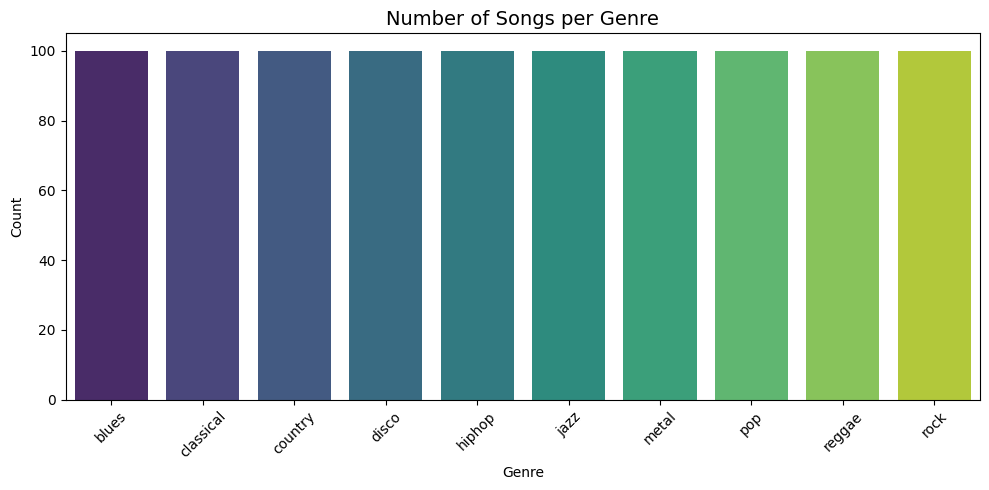

In [19]:

print("Genres:", df['label'].unique())
print("\nSongs per genre:")
print(df['label'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Number of Songs per Genre', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
X = df.drop(columns=['filename', 'label'])   
y = df['label']                               
print("Features shape:", X.shape)
print("Labels:", y.unique())

Features shape: (1000, 58)
Labels: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [21]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Label encoding:")
for i, genre in enumerate(le.classes_):
    print(f"  {i} → {genre}")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n Encoding and scaling done!")

Label encoding:
  0 → blues
  1 → classical
  2 → country
  3 → disco
  4 → hiphop
  5 → jazz
  6 → metal
  7 → pop
  8 → reggae
  9 → rock

 Encoding and scaling done!


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)
print(f"Training samples : {X_train.shape[0]}")
print(f"Testing samples  : {X_test.shape[0]}")

Training samples : 800
Testing samples  : 200


In [23]:

models = {
    "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM"           : SVC(kernel='rbf', random_state=42),
    "KNN"           : KNeighborsClassifier(n_neighbors=5),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(256, 128), 
                                    max_iter=500, random_state=42)
}
results = {}
for name, model in models.items():
    print(f"Training {name}...", end=" ")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc*100:.2f}%")
print("\n Training Complete!")

Training Random Forest... Accuracy: 77.50%
Training SVM... Accuracy: 73.00%
Training KNN... Accuracy: 68.50%
Training MLP Neural Net... Accuracy: 73.50%

 Training Complete!


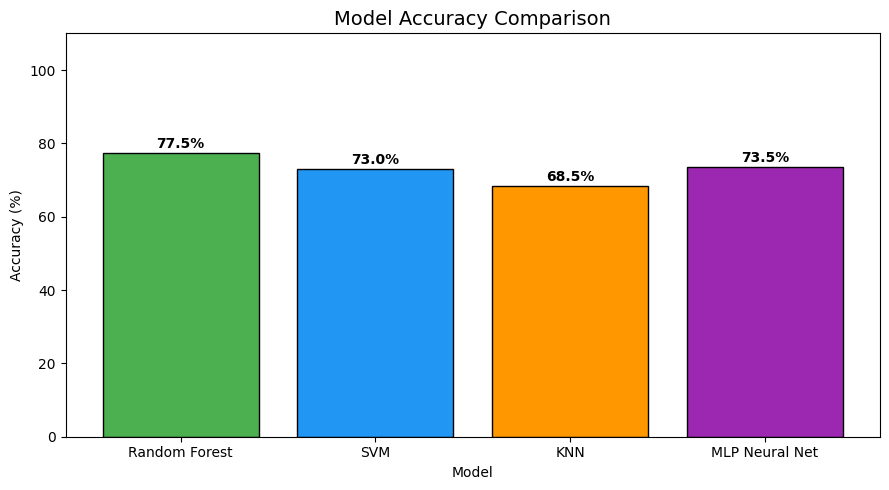


 Best Model: Random Forest (77.50%)


In [25]:

plt.figure(figsize=(9, 5))
colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']
bars = plt.bar(results.keys(), [v*100 for v in results.values()], color=colors, edgecolor='black')

for bar, acc in zip(bars, results.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc*100:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 110)
plt.tight_layout()
plt.show()
best_model_name = max(results, key=results.get)
print(f"\n Best Model: {best_model_name} ({results[best_model_name]*100:.2f}%)")

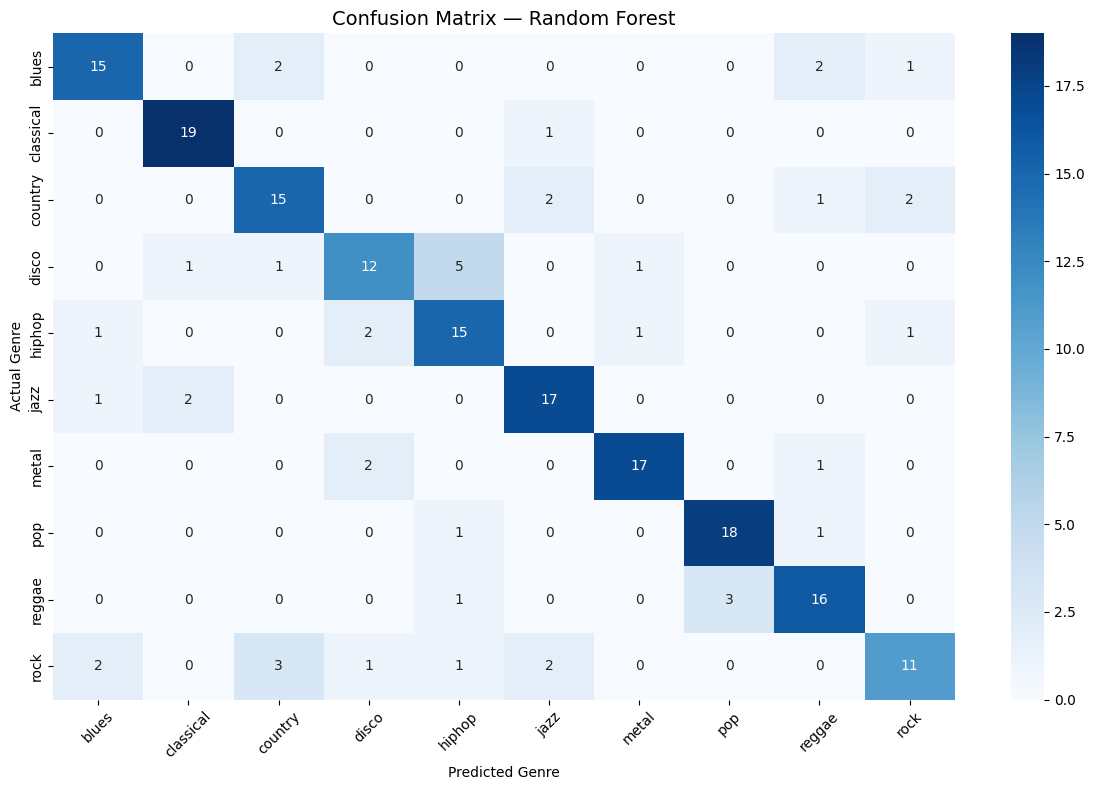


 Classification Report:
              precision    recall  f1-score   support

       blues       0.79      0.75      0.77        20
   classical       0.86      0.95      0.90        20
     country       0.71      0.75      0.73        20
       disco       0.71      0.60      0.65        20
      hiphop       0.65      0.75      0.70        20
        jazz       0.77      0.85      0.81        20
       metal       0.89      0.85      0.87        20
         pop       0.86      0.90      0.88        20
      reggae       0.76      0.80      0.78        20
        rock       0.73      0.55      0.63        20

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.77      0.78      0.77       200



In [26]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
genre_names = le.classes_
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=genre_names, yticklabels=genre_names)
plt.title(f'Confusion Matrix — {best_model_name}', fontsize=14)
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Detailed report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=genre_names))

In [27]:
import pickle
import os

os.makedirs('models', exist_ok=True)
with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('models/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print(f"Best model '{best_model_name}' saved to models/")
print("Scaler and Label Encoder also saved!")

Best model 'Random Forest' saved to models/
Scaler and Label Encoder also saved!


In [33]:
import librosa

def predict_genre(file_path):
    
    y_audio, sr = librosa.load(file_path, duration=30)

    features = []

    features.append(len(y_audio))

    chroma = librosa.feature.chroma_stft(y=y_audio, sr=sr)
    features += [chroma.mean(), chroma.var()]

    rms = librosa.feature.rms(y=y_audio)
    features += [rms.mean(), rms.var()]

    spec_cent = librosa.feature.spectral_centroid(y=y_audio, sr=sr)
    features += [spec_cent.mean(), spec_cent.var()]

    spec_bw = librosa.feature.spectral_bandwidth(y=y_audio, sr=sr)
    features += [spec_bw.mean(), spec_bw.var()]

    rolloff = librosa.feature.spectral_rolloff(y=y_audio, sr=sr)
    features += [rolloff.mean(), rolloff.var()]

    zcr = librosa.feature.zero_crossing_rate(y_audio)
    features += [zcr.mean(), zcr.var()]

    harmony, perceptr = librosa.effects.hpss(y_audio)
    features += [harmony.mean(), harmony.var(), perceptr.mean(), perceptr.var()]

    tempo, _ = librosa.beat.beat_track(y=y_audio, sr=sr)
    features += [float(tempo)]

    mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=20)
    for coef in mfcc:
        features += [coef.mean(), coef.var()]

    print(f"Total features extracted: {len(features)}")  

    features_scaled = scaler.transform([features])
    pred_encoded = best_model.predict(features_scaled)
    pred_genre = le.inverse_transform(pred_encoded)[0]

    return pred_genre

test_file = 'archive/Data/genres_original/rock/rock.00000.wav'
predicted = predict_genre(test_file)
print(f"Predicted Genre: {predicted.upper()}")

Total features extracted: 58
Predicted Genre: DISCO
